In [34]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
# Import the data
df=pd.read_csv("Resources/lending_data.csv")
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [36]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column loan_size has 0 null values
Column interest_rate has 0 null values
Column borrower_income has 0 null values
Column debt_to_income has 0 null values
Column num_of_accounts has 0 null values
Column derogatory_marks has 0 null values
Column total_debt has 0 null values
Column loan_status has 0 null values


In [37]:
# # Find duplicate entries
# print(f"Duplicate entries: {df.duplicated().sum()}")

# Identify loan Status category - [looks like it is Binary - 0,1]
count = df["loan_status"].unique()
count

array([0, 1], dtype=int64)

###  The theory explained online for credit evaluation considers the 5-C's to evaluate credit risk - "character, capacity, capital, collateral & conditions". 
#### Since we do not have all the data to accurately assess the credit risk, the approach taken for the analysis is as follows: 
- Character - "derogatory remarks" - typically explained as credit score / credit history
- capacity - "debt to income ratio"
- capital - "total debt" - This could be amount of money an applicant has - per online explanation
- collateral - "no data" - this typically is explained as asset that can back or act as security for loan
- conditions - "loan amount & Interest" - 

In [38]:
df.dtypes

loan_size           float64
interest_rate       float64
borrower_income       int64
debt_to_income      float64
num_of_accounts       int64
derogatory_marks      int64
total_debt            int64
loan_status           int64
dtype: object

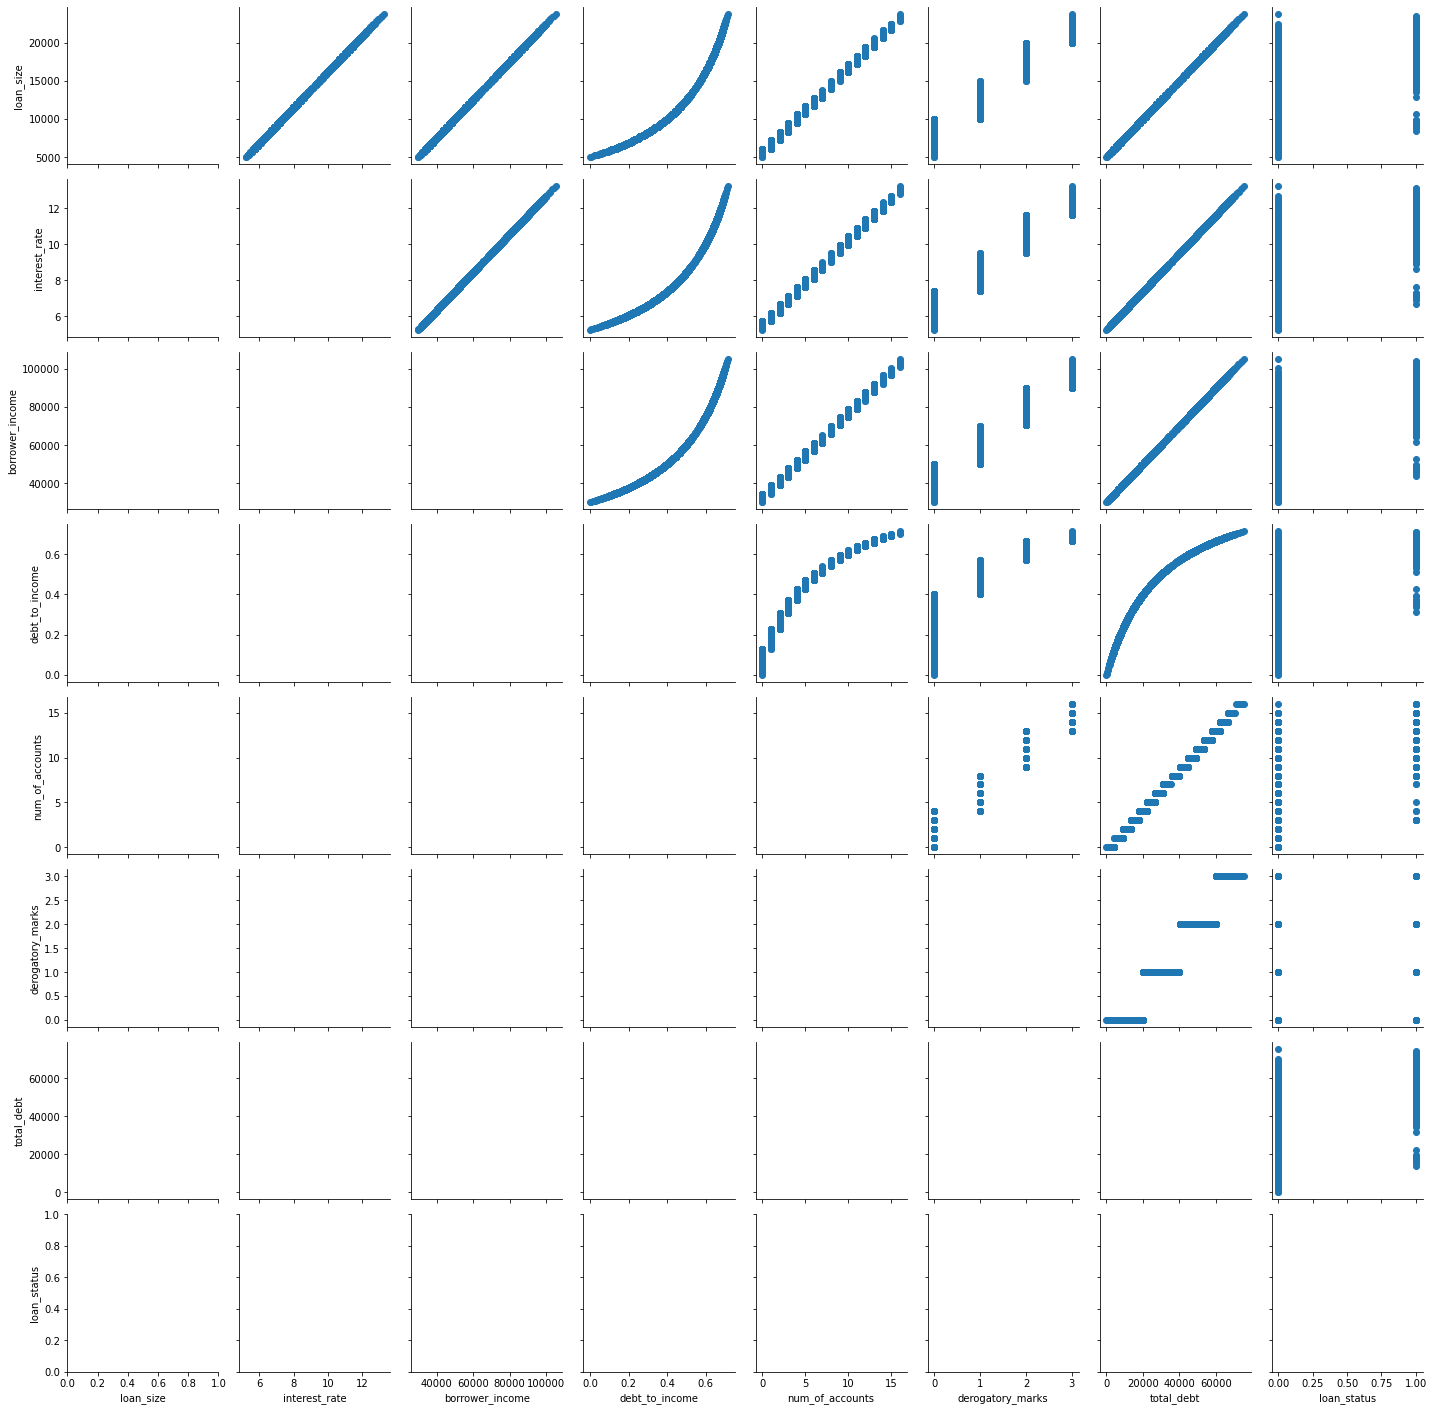

In [39]:
# importing seaborn package
# import seaborn
  
# # Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
# seaborn.PairGrid(df).map_upper(plt.scatter)

In [46]:
# Split the data into X_train, X_test, y_train, y_test
X = df.drop('loan_status', axis=1)
y = df['loan_status'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [49]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917973586463062
